In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Settings

In [2]:
# colors

sns.set_style("white")
flatui = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
#flatui = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
#flatui = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']
sns.set_palette(flatui)

# workday, weekend
workdays_colors=["#426287","#a3a3a3"]

#good, bad
#weather_colors = ["#5f5961", "#c25050"]
#weather_colors = ["#5f5961", "#c28282"]
#weather_colors = ["#5f5961", "#c28282"]
weather_colors = ["#5f5961", "#c27474"]




In [3]:
x_size, y_size = 12,8
plt.rcParams.update({'font.size': 16})

In [4]:
use_external_weather = True

## Read the data

In [5]:
df = pd.read_csv("data\\google\\Podatki o prometu v Ljubljani 5 oktober - 8 november 2020.csv", encoding="utf8", skiprows=1)
df[df.route_id == 4].tail(100)

,Unnamed: 0,timestamp,route_id,t_duration_in_traffic_[s],t_duration_[s],t_distance_[m],w_city,w_description,w_visibility,w_clouds,w_temperature,w_temperature_feel,w_pressure,w_humidity,w_wind_speed,w_wind_degree,w_sunrise,w_sunset
23884,23884,2020-11-08 06:50:01.702366,4,512.0,654.0,4118.0,Ljubljana,clear sky,10000.0,0.0,2.52,-0.14,1028.0,72.0,0.57,273.0,1.604815e+09,1.604850e+09
23890,23890,2020-11-08 07:00:01.942462,4,514.0,654.0,4118.0,Ljubljana,clear sky,10000.0,0.0,2.79,0.23,1028.0,72.0,0.48,268.0,1.604815e+09,1.604850e+09
23896,23896,2020-11-08 07:10:03.760054,4,510.0,654.0,4118.0,Ljubljana,clear sky,10000.0,0.0,2.78,0.22,1028.0,72.0,0.48,268.0,1.604815e+09,1.604850e+09
23902,23902,2020-11-08 07:20:01.581460,4,530.0,654.0,4118.0,Ljubljana,clear sky,10000.0,0.0,2.78,0.22,1028.0,72.0,0.48,268.0,1.604815e+09,1.604850e+09
23908,23908,2020-11-08 07:30:01.826069,4,546.0,654.0,4118.0,Ljubljana,clear sky,10000.0,4.0,2.79,0.25,1028.0,72.0,0.45,180.0,1.604815e+09,1.604850e+09
23914,23914,2020-11-08 07:40:01.604078,4,535.0,654.0,4118.0,Ljubljana,clear sky,10000.0,4.0,2.79,0.25,1028.0,72.0,0.45,180.0,1.604815e+09,1.604850e+09
23920,23920,2020-11-08 07:50:01.739754,4,561.0,654.0,4118.0,Ljubljana,fog,200.0,90.0,1.48,-1.16,1027.0,92.0,1.00,0.0,1.604815e+09,1.604850e+09
23926,23926,2020-11-08 08:00:03.028985,4,536.0,654.0,4118.0,Ljubljana,fog,200.0,90.0,1.61,-1.01,1027.0,92.0,1.00,0.0,1.604815e+09,1.604850e+09
23932,23932,2020-11-08 08:10:01.578427,4,524.0,654.0,4118.0,Ljubljana,fog,200.0,90.0,1.61,-1.01,1027.0,92.0,1.00,0.0,1.604815e+09,1.604850e+09
23938,23938,2020-11-08 08:20:01.864055,4,521.0,654.0,4118.0,Ljubljana,fog,200.0,90.0,1.57,-0.61,1028.0,92.0,0.37,263.0,1.604815e+09,1.604850e+09


In [6]:
df[df.route_id == 4].describe()

,Unnamed: 0,route_id,t_duration_in_traffic_[s],t_duration_[s],t_distance_[m],w_visibility,w_clouds,w_temperature,w_temperature_feel,w_pressure,w_humidity,w_wind_speed,w_wind_degree,w_sunrise,w_sunset
count,4080.000000,4080.0,4080.000000,4080.000000,4080.0,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4.066000e+03,4.066000e+03
mean,12241.000000,4.0,584.194363,630.463725,4118.0,9227.387113,62.805460,9.837649,8.365231,1018.752336,83.176094,1.167336,154.021643,1.603282e+09,1.603321e+09
std,7067.633267,0.0,94.987622,17.128279,0.0,2237.572661,35.257699,3.614214,3.993256,7.201093,13.719487,1.052998,121.249199,9.412095e+05,9.392172e+05
min,4.000000,4.0,443.000000,612.000000,4118.0,200.000000,0.000000,1.140000,-1.790000,1005.000000,38.000000,0.040000,0.000000,1.601788e+09,1.601829e+09
25%,6122.500000,4.0,517.000000,612.000000,4118.0,10000.000000,36.000000,7.330000,5.710000,1013.000000,72.000000,0.500000,24.000000,1.602480e+09,1.602520e+09
50%,12241.000000,4.0,566.000000,622.000000,4118.0,10000.000000,75.000000,9.690000,8.370000,1019.000000,87.000000,1.000000,140.000000,1.603172e+09,1.603210e+09
75%,18359.500000,4.0,627.000000,651.000000,4118.0,10000.000000,96.000000,11.970000,10.910000,1023.000000,94.000000,1.500000,270.000000,1.604036e+09,1.604073e+09
max,24478.000000,4.0,1171.000000,654.000000,4118.0,10000.000000,100.000000,19.270000,19.880000,1037.000000,100.000000,7.200000,360.000000,1.604815e+09,1.604850e+09


In [7]:
df = df[["timestamp", "route_id", "t_duration_in_traffic_[s]", "t_distance_[m]", "w_description", "w_temperature"]]
df.head()

,timestamp,route_id,t_duration_in_traffic_[s],t_distance_[m],w_description,w_temperature
0,2020-10-04 23:30:00.281085,0,812.0,6894.0,clear sky,10.95
1,2020-10-04 23:30:00.733197,1,496.0,3601.0,clear sky,10.95
2,2020-10-04 23:30:01.132201,2,492.0,3681.0,broken clouds,10.92
3,2020-10-04 23:30:01.912402,3,419.0,3068.0,broken clouds,10.92
4,2020-10-04 23:30:02.727843,4,522.0,4118.0,clear sky,10.92


In [8]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["date"] = df["timestamp"].dt.date
df['time'] = pd.DatetimeIndex(df['timestamp']).hour + pd.DatetimeIndex(df['timestamp']).minute/60# + pd.DatetimeIndex(df['timestamp']).second/3600
df["hour"] = df["timestamp"].dt.hour
#df["hour"] = df["timestamp"].dt.time.astype(str).map(lambda x: float(x.split(":")[0]) + float(x.split(":")[1])/60)
df["weekday"] = df["timestamp"].dt.weekday
df["workday"] = df["weekday"].map(lambda x: 1 if x < 5 else 0)
df["speed"] = df["t_distance_[m]"]/df["t_duration_in_traffic_[s]"]
df["pace"] = 1/df["speed"]

## Weather data


In [9]:
if not use_external_weather:
    weather = {'clear sky': 'dry', 
           'broken clouds': 'dry',
           'scattered clouds': 'dry', 
           'few clouds': 'dry',
           'moderate rain': 'wet',
           'light rain': 'humid',
           'heavy intensity rain': 'wet',
           'overcast clouds': 'humid', 
           'heavy intensity shower rain': 'wet',
           np.nan: '',
           'shower rain': 'wet',
           'light intensity shower rain': 'wet',
           'fog': 'humid', 
           'mist': 'humid',
           'light intensity drizzle': 'humid', 
           'drizzle': 'humid',
           'heavy intensity drizzle': 'wet'}
    df['weather'] = df["w_description"].map(lambda x: weather[x])
    
    for date in df['date'].unique():
        locs = date == df['date']

        avg_weather = df.loc[locs, 'weather'].mode()[0] # the most frequent entry in a given day
        avg_t = np.nanmean(df.loc[locs, 'w_temperature'])

        df.loc[locs, "avg daily weather"] = avg_weather
        df.loc[locs, "avg daily temp"] = avg_t

        weather = "good" if (avg_weather == 'dry' and avg_t >= 5) or (avg_weather == 'humid' and avg_t >= 10) else 'bad'

        df.loc[locs, "weather"] = weather
else:
    df_weather = pd.read_csv('data\\weather.csv')
    df_weather['date'] = pd.to_datetime(df_weather['date']).dt.date
    for date in df['date'].unique():
        weather = df_weather.loc[df_weather['date'] == date, 'weather'].iloc[0]
        locs = date == df['date']
        df.loc[locs, "weather"] = weather

## Example export

In [10]:
df.columns

Index(['timestamp', 'route_id', 't_duration_in_traffic_[s]', 't_distance_[m]',
       'w_description', 'w_temperature', 'date', 'time', 'hour', 'weekday',
       'workday', 'speed', 'pace', 'weather'],
      dtype='object')

In [11]:
df[['timestamp', 'route_id', 't_duration_in_traffic_[s]', 't_distance_[m]', 'speed', 'pace', 'w_description', 'w_temperature','weather']].head(25).to_excel("data\\google_data_example.xlsx", index=False)

In [12]:
df = df[['timestamp', 
         'date', 
         'time', 
         'hour', 
         'route_id', 
         'speed',
         'pace',
         'workday',
         'weather', 
         't_duration_in_traffic_[s]', 
         't_distance_[m]',
         'weekday']]

In [13]:
df_filtered=df[['timestamp', 
                'date', 
                'time', 
                'hour', 
                'route_id', 
                'speed',
                'pace',
                'workday',
                'weather']]

In [14]:
df_filtered.to_csv("data\\google_data_preprocessed.csv", index=False)

# Validation

## Circadian

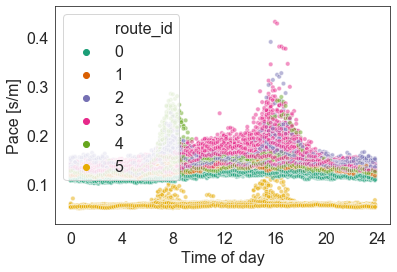

In [15]:
#sns.scatterplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)
#sns.lineplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)

sns.scatterplot(data=df, y='pace', x='time', hue='route_id', alpha=0.5, palette = flatui, s=20)
#sns.lineplot(data=df, y='dt', x='time', hue='route_id', alpha=0.75)


f = plt.gcf()
#f.set_size_inches(15,10)
plt.xlabel("Time of day")
plt.ylabel("Pace [s/m]")
plt.xticks(np.arange(0,25, 4), np.arange(0, 25, 4))

#plt.xticks(np.arange(25), np.arange(25))
#plt.savefig("time.pdf", bbox_inches="tight")
#plt.legend(routes.astype(str))
plt.show()

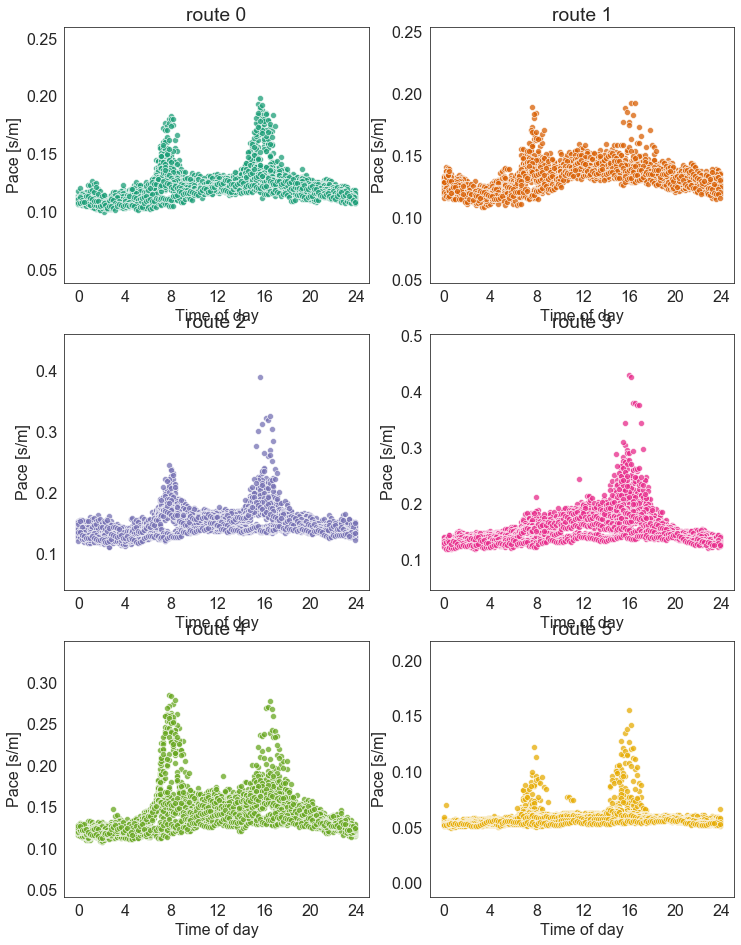

In [16]:
routes = df.route_id.unique()
fig, axes = plt.subplots(3,2)

for i, (route, color) in enumerate(zip(routes,flatui)):
    ax = axes.flat[i]
    sns.scatterplot(data=df[df.route_id == route], y='pace', x='time', alpha=0.75, color=color, ax = ax)
    ax.set_title("route " + str(route))
    ax.set_xlabel("Time of day")
    ax.set_ylabel("Pace [s/m]")
    ax.set_xticks(np.arange(0, 25, 4))
    ax.set_xticklabels(np.arange(0, 25, 4))
    

    

f = plt.gcf()
f.set_size_inches(x_size,2*y_size)
plt.savefig("figs\\circadian_pace.pdf", bbox_inches="tight")
plt.savefig("figs\\circadian_pace.png", bbox_inches="tight")
plt.savefig("figs\\circadian_pace.svg", bbox_inches="tight")
plt.show()   

## Violinplots and boxplots

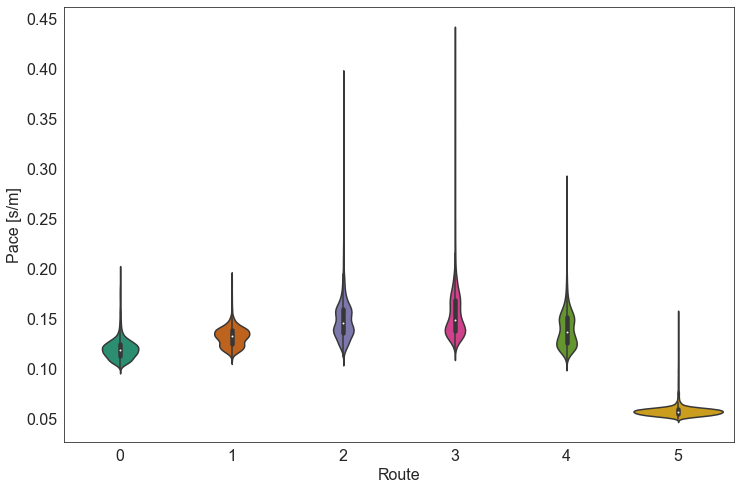

In [17]:
sns.violinplot(data=df, y='pace', x='route_id')
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Pace [s/m]")
plt.xticks
plt.savefig("figs\\distribution_pace.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_pace.svg", bbox_inches="tight")
plt.savefig("figs\\distribution_pace.png", bbox_inches="tight")
#plt.ylim([0.01,0.3])
plt.show()

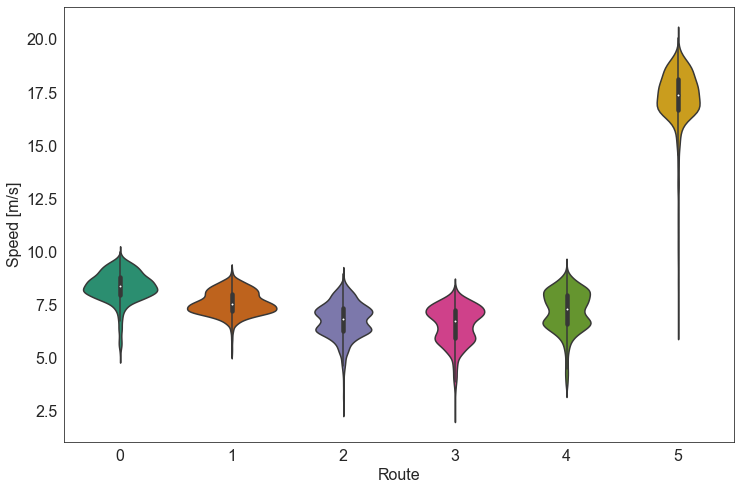

In [18]:
sns.violinplot(data=df, y='speed', x='route_id')
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Speed [m/s]")
plt.xticks
plt.savefig("figs\\distribution_speed.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_speed.svg", bbox_inches="tight")
plt.savefig("figs\\distribution_speed.png", bbox_inches="tight")
plt.show()

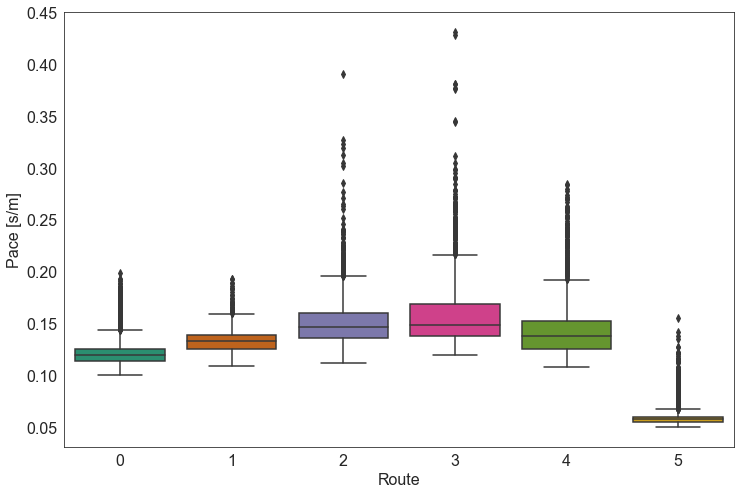

In [19]:
sns.boxplot(data=df, y='pace', x='route_id')
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Pace [s/m]")
plt.xticks
plt.savefig("figs\\distribution_pace_box.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_pace_box.svg", bbox_inches="tight")
plt.savefig("figs\\distribution_pace_box.png", bbox_inches="tight")
plt.show()

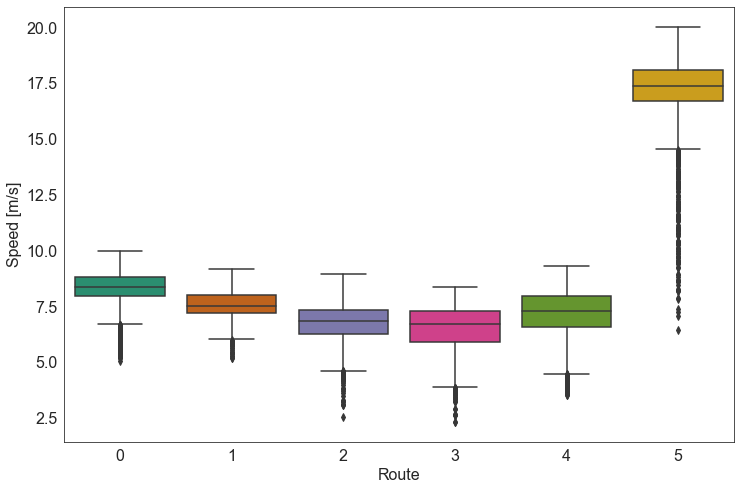

In [20]:
sns.boxplot(data=df, y='speed', x='route_id')
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Speed [m/s]")
plt.xticks
plt.savefig("figs\\distribution_speed_box.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_speed_box.svg", bbox_inches="tight")
plt.savefig("figs\\distribution_speed_box.png", bbox_inches="tight")
plt.show()

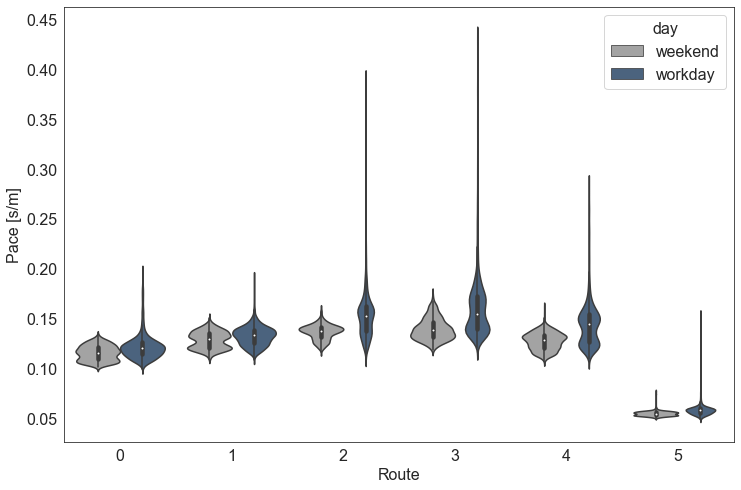

In [21]:
df_work = df.copy()
df_work['day'] = ["workday" if x == 1 else "weekend" for x in df_work['workday']] 

sns.violinplot(data=df_work, y='pace', x='route_id', hue = 'day', palette=workdays_colors[::-1])
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Pace [s/m]")
plt.xticks
plt.savefig("figs\\distribution_workday.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_workday.svg", bbox_inches="tight")
plt.savefig("figs\\distribution_workday.png", bbox_inches="tight")
plt.show()

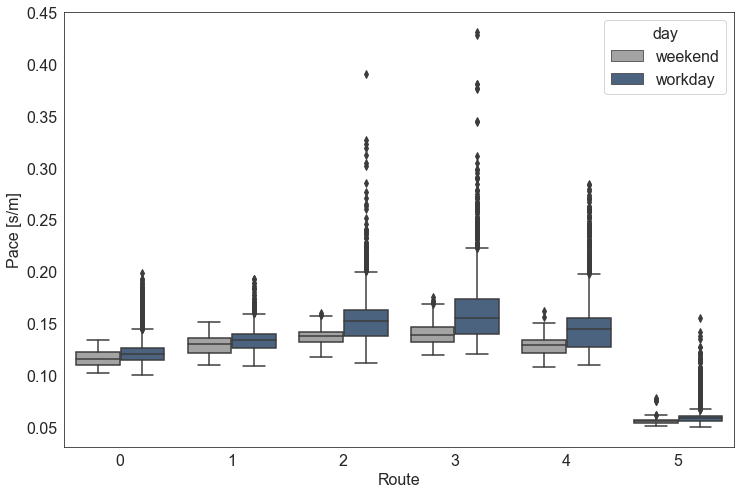

In [22]:
df_work = df.copy()
df_work['day'] = ["workday" if x == 1 else "weekend" for x in df_work['workday']] 

sns.boxplot(data=df_work, y='pace', x='route_id', hue = 'day', palette=workdays_colors[::-1])
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Pace [s/m]")
plt.xticks
plt.savefig("figs\\distribution_workday_box.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_workday_box.svg", bbox_inches="tight")
plt.savefig("figs\\distribution_workday_box.png", bbox_inches="tight")
plt.show()

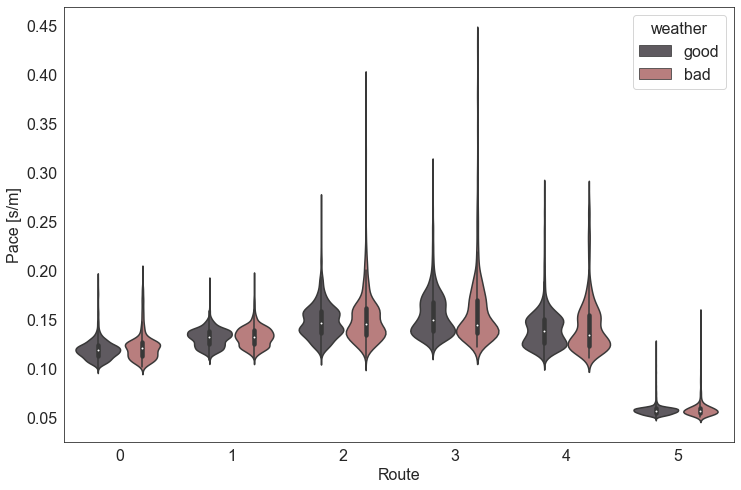

In [23]:
sns.violinplot(data=df, y='pace', x='route_id', hue = 'weather', palette=weather_colors)
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Pace [s/m]")
plt.xticks
#plt.savefig("violin.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_pace_weather.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_pace_weather.svg", bbox_inches="tight")
plt.savefig("figs\\distribution_pace_weather.png", bbox_inches="tight")
plt.show()

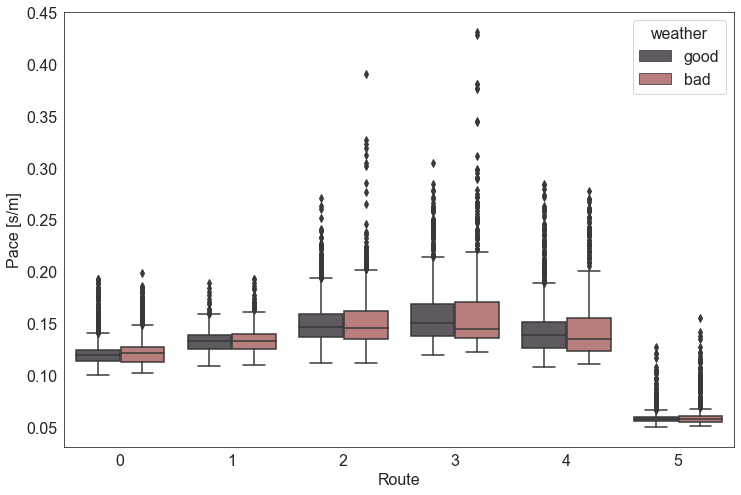

In [24]:
sns.boxplot(data=df, y='pace', x='route_id', hue = 'weather', palette=weather_colors)
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Pace [s/m]")
plt.xticks
#plt.savefig("violin.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_pace_weather_box.pdf", bbox_inches="tight")
plt.savefig("figs\\distribution_pace_weather_box.svg", bbox_inches="tight")
plt.savefig("figs\\distribution_pace_weather_box.png", bbox_inches="tight")
plt.show()

# Data separation

## Routes

In [25]:
df1 = df[['time', 'pace', 'route_id']].copy()
df1.columns = ['X', 'Y', 'route_id']
df1.to_csv("data\\01_routes.csv", index=False)

## Workdays / weekends

In [26]:
df21 = df.loc[df.workday == 0, ['time', 'pace', 'route_id']].copy()
df21.columns = ['X', 'Y', 'route_id']
df21.to_csv("data\\02_routes_weekends.csv", index=False)

df22 = df.loc[df.workday == 1, ['time', 'pace', 'route_id']].copy()
df22.columns = ['X', 'Y', 'route_id']
df22.to_csv("data\\02_routes_workdays.csv", index=False)

## Weather

In [27]:
df31 = df.loc[df["weather"] == "bad", ['time', 'pace', 'route_id']].copy()
df31.columns = ['X', 'Y', 'route_id']
df31.to_csv("data\\03_routes_bad_weather.csv", index=False)

df32 = df.loc[df["weather"] == "good", ['time', 'pace', 'route_id']].copy()
df32.columns = ['X', 'Y', 'route_id']
df32.to_csv("data\\03_routes_good_weather.csv", index=False)

# Saving the data in CosinorPy format

In [28]:
from CosinorPy import file_parser

In [29]:
df_cosinor1 = df1.copy()
df_cosinor1.columns = ['x', 'y', 'test']
df_cosinor1['test'] = df_cosinor1['test'].map(lambda x: "route_" + str(x))
file_parser.export(df_cosinor1, "data\\google_traffic.xlsx")

In [30]:
df_cosinor21 = df21.copy()
df_cosinor21.columns = ['x', 'y', 'test']
df_cosinor21['test'] = df_cosinor21['test'].map(lambda x: "route_" + str(x) + "_weekend")

df_cosinor22 = df22.copy()
df_cosinor22.columns = ['x', 'y', 'test']
df_cosinor22['test'] = df_cosinor22['test'].map(lambda x: "route_" + str(x) + "_workday")

df_cosinor2 = pd.concat([df_cosinor21, df_cosinor22])


file_parser.export(df_cosinor2, "data\\google_traffic_workdays.xlsx")


In [31]:
df_cosinor31 = df31.copy()
df_cosinor31.columns = ['x', 'y', 'test']
df_cosinor31['test'] = df_cosinor31['test'].map(lambda x: "route_" + str(x) + "_bad_weather")

df_cosinor32 = df32.copy()
df_cosinor32.columns = ['x', 'y', 'test']
df_cosinor32['test'] = df_cosinor32['test'].map(lambda x: "route_" + str(x) + "_good_weather")

df_cosinor3 = pd.concat([df_cosinor31, df_cosinor32])


file_parser.export(df_cosinor3, "data\\google_traffic_weather.xlsx")